## 9. XGBOOST

The XGboost (Extra Gradient boosting) starts from the decision tree that is implemented in data mining to classify or forecast on a target variable (and), through automatic learning that is done on a set of data, using several weak classifiers that in this case, as mentioned, are our decision trees, but enhancing the results of these, due to the sequential processing of data with a loss or cost function, which minimizes the error iteration after iteration, making it a strong predictor.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV # Ridge
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import r2_score # R^2
from sklearn.model_selection import train_test_split # split data
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler # estandarization
from sklearn import preprocessing # estandarization
from sklearn.ensemble import IsolationForest # outliers
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC # SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb 
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
import random
random.seed(12345)
from sklearn.impute import KNNImputer

In [2]:
import pickle

In [3]:
data1 = pd.read_csv('../data/modeldata.csv')
data = data1.drop('Unnamed: 0',1)
data

,application_type_Joint App,"('installment',)",term_ 60 months,"('dti',)","('fico_range_low',)","('acc_now_delinq',)","('num_rev_accts',)","('num_il_tl',)","('mo_sin_old_rev_tl_op',)","('num_sats',)",...,"('total_il_high_credit_limit',)","('int_rate',)","('total_acc',)","('loan_amnt',)",home_ownership_RENT,home_ownership_OWN,home_ownership_MORTAGE&OTHER,"('last_fico_range_high',)","('tot_cur_bal',)",paid
0,0,-0.066182,0,-0.076735,1.000000,0.0,1.8,0.625,0.982143,1.500000,...,2.167452,-0.9024,1.3750,-0.085417,0,1,0,0.318182,2.045887,0
1,0,-0.293676,0,-0.968163,0.000000,0.0,-1.1,-0.750,0.062500,-1.166667,...,-0.674537,1.8976,-1.1875,-0.450000,1,0,0,-0.181818,-0.416741,0
2,0,-0.457306,0,-0.392653,0.714286,0.0,0.1,0.125,-1.017857,1.333333,...,0.013921,-0.9024,0.1875,-0.425000,0,0,1,0.272727,1.109212,0
3,0,-0.424834,1,-0.638367,0.142857,0.0,0.3,-0.375,-0.991071,0.666667,...,-0.637968,0.4848,-0.1875,-0.216667,1,0,0,-0.272727,-0.386501,0
4,0,0.345384,0,-0.577143,0.000000,0.0,-0.8,-0.500,-0.607143,-1.166667,...,-0.032839,0.4848,-0.8750,0.116667,0,0,1,-0.045455,0.270862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462221,0,0.074068,0,0.746939,-0.142857,0.0,-0.1,-0.250,0.169643,-0.333333,...,-0.729001,0.4160,-0.3750,-0.085417,1,0,0,0.045455,-0.336689,0
462222,0,0.055234,0,0.470204,0.000000,0.0,0.6,4.125,0.607143,0.333333,...,1.620201,-0.1600,2.3125,-0.050000,0,0,1,-0.545455,0.886921,1
462223,0,-0.199753,1,1.058776,-0.142857,0.0,-0.4,0.625,-0.508929,-0.333333,...,0.038300,0.4800,-0.1250,0.033333,1,0,0,-1.090909,-0.255680,1
462224,0,-0.194217,1,0.755918,0.285714,0.0,0.2,-0.500,-0.732143,1.000000,...,0.932547,1.1200,-0.2500,-0.050000,1,0,0,-1.727273,-0.119125,1


In [4]:
endogena = ['paid'] 


exogenas = list(set(list(data.columns))-set(endogena))

X = data[exogenas].values
Y = data[endogena].values

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

(386909, 22)
(92446, 22)


In [6]:
ytrain_df = pd.DataFrame(Y_train, columns = ['paid'])
ytest_df = pd.DataFrame(Y_test, columns = ['paid'])

In [7]:
ytrain_df['paid'].value_counts(normalize=True)

0    0.714287
1    0.285713
Name: paid, dtype: float64

In [8]:
ytest_df['paid'].value_counts(normalize=True)

0    0.74755
1    0.25245
Name: paid, dtype: float64

In [9]:
%%time
param_test1 = {
    'max_depth' : [4,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
 }
gsearch_RandomForest = GridSearchCV(estimator = RandomForestClassifier(500), 
                               param_grid = param_test1, scoring='roc_auc',n_jobs=-1, iid=False, cv=5)
gsearch_RandomForest.fit(X_train, Y_train)

C:\Users\34639\anaconda3\envs\lending\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Wall time: 1h 43min


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc')

In [10]:
%%time
param_test2 = {
 'learning_rate':np.arange(0.1,2.0,0.2),
 'objective':['binary:logistic'],
 'gamma': [0.5, 1, 1.5, 2],
 'subsample': [0.6, 0.8, 1.0],
 'colsample_bytree': [0.6, 0.8, 1.0],
 'max_depth': [3, 4, 5, 8]
}
gsearch_XGBoost = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=500, subsample=0.8,
                                                             colsample_bytree=0.8,objective= 'binary:logistic',
                                                             scale_pos_weight=1, seed=40, nthread = 6), 
                               param_grid = param_test1, scoring='roc_auc',n_jobs=3,iid=False, cv=5)
gsearch_XGBoost.fit(X_train, Y_train)

C:\Users\34639\anaconda3\envs\lending\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


[21:18:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 2h 2min 25s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=500, n_jobs=None, nthread=6,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=40, subsample=0.8,
                                     tr

In [11]:
%%time
gsearch_XGBoost2 = gsearch_XGBoost.best_estimator_
gsearch_XGBoost2.fit(X_train, Y_train)

[21:19:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 1min 46s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, criterion='gini',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, max_features='auto',
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=6, nthread=6, num_parallel_tree=1,
              random_state=40, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=40, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [12]:
Y_pred_XGBoost2 = gsearch_XGBoost2.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_XGBoost2))
print(classification_report(Y_test,Y_pred_XGBoost2))

[[64744  4364]
 [ 4497 18841]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     69108
           1       0.81      0.81      0.81     23338

    accuracy                           0.90     92446
   macro avg       0.87      0.87      0.87     92446
weighted avg       0.90      0.90      0.90     92446



We found 93% accuracy for those who will pay and 81% accuracy for those who will not pay.

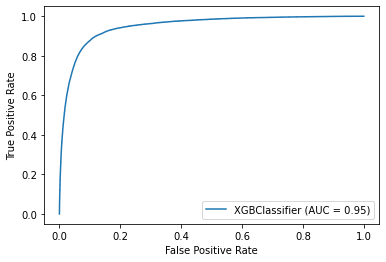

XGBoost score train:  0.9163472547808399
XGBoost score:  0.9041494494083032


In [13]:
metrics.plot_roc_curve(gsearch_XGBoost2, X_test, Y_test)
plt.show() 
print("XGBoost score train: ", gsearch_XGBoost2.score(X_train, Y_train))
print("XGBoost score: ", gsearch_XGBoost2.score(X_test, Y_test))

We have an Area Under the Curve(AUC) of 95%.

### Confussion Matrix

In [14]:
from sklearn.metrics import plot_confusion_matrix

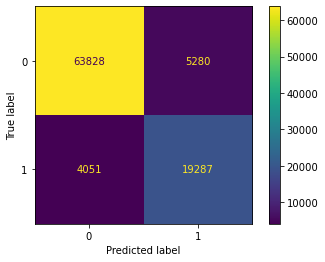

In [15]:
plot_confusion_matrix(gsearch_RandomForest, X=X_test, y_true=Y_test)

The values of the main diagonal a=63828 and d=19287 correspond to the values estimated correctly by the model, both the true positive_ TP(d), and the true negative_TN (a).

The other diagonal, therefore, represents the cases in which the model "made a mistake" (c=4051 false negatives_FN, b=5280 false positives_FP).

### Saving the model

In [16]:
import pickle

In [17]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
filename = 'gsearch_XGBoost2.sav'
pickle.dump(gsearch_XGBoost2, open(filename, 'wb'))

In [ ]:
xgboost_model = pickle.load(open('gsearch_XGBoost2.sav', 'rb'))
xgboost_model

In [ ]:
a = xgboost_model.score(X_test, Y_test)
print("Acurracy : " , a*100)